In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

In [9]:
insurance = pd.read_csv('insuranceData.csv')

In [3]:
insurance.head()

,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16884.92400
1,18,33.770,1,no,1725.55230
2,28,33.000,3,no,4449.46200
3,33,22.705,0,no,21984.47061
4,32,28.880,0,no,3866.85520


In [10]:
from sklearn.preprocessing import LabelEncoder

le_smoker = LabelEncoder() #importing label encoder for the smoker column

In [12]:
insurance["smoker_enc"] = le_smoker.fit_transform(insurance["smoker"]) #encoding the smoker column

In [13]:
insurance

,age,bmi,children,smoker,charges,smoker_enc
0,19,27.900,0,yes,16884.92400,1
1,18,33.770,1,no,1725.55230,0
2,28,33.000,3,no,4449.46200,0
3,33,22.705,0,no,21984.47061,0
4,32,28.880,0,no,3866.85520,0
...,...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830,0
1334,18,31.920,0,no,2205.98080,0
1335,18,36.850,0,no,1629.83350,0
1336,21,25.800,0,no,2007.94500,0


In [14]:
from sklearn.preprocessing import OneHotEncoder #importing one hot encoding

In [17]:
smoker_ohe_array

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [19]:
smoker_df_ohe = pd.DataFrame(smoker_ohe_array, columns= ["Smoker_"+str(int(i))for i in range(smoker_ohe_array.shape[1])])

insurance = pd.concat([insurance, smoker_df_ohe], axis=1)

#adding the created hot one encoded array to the original dataframe

In [20]:
insurance

,age,bmi,children,smoker,charges,smoker_enc,Smoker_0,Smoker_1
0,19,27.900,0,yes,16884.92400,1,0.0,1.0
1,18,33.770,1,no,1725.55230,0,1.0,0.0
2,28,33.000,3,no,4449.46200,0,1.0,0.0
3,33,22.705,0,no,21984.47061,0,1.0,0.0
4,32,28.880,0,no,3866.85520,0,1.0,0.0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830,0,1.0,0.0
1334,18,31.920,0,no,2205.98080,0,1.0,0.0
1335,18,36.850,0,no,1629.83350,0,1.0,0.0
1336,21,25.800,0,no,2007.94500,0,1.0,0.0


In [21]:
insurance.isnull().values.any()

False

In [24]:
del insurance['smoker']

In [25]:
insurance

,age,bmi,children,charges,smoker_enc,Smoker_0,Smoker_1
0,19,27.900,0,16884.92400,1,0.0,1.0
1,18,33.770,1,1725.55230,0,1.0,0.0
2,28,33.000,3,4449.46200,0,1.0,0.0
3,33,22.705,0,21984.47061,0,1.0,0.0
4,32,28.880,0,3866.85520,0,1.0,0.0
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1.0,0.0
1334,18,31.920,0,2205.98080,0,1.0,0.0
1335,18,36.850,0,1629.83350,0,1.0,0.0
1336,21,25.800,0,2007.94500,0,1.0,0.0


In [29]:
def plot_corr(insurance, size=11):
    corr = insurance.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

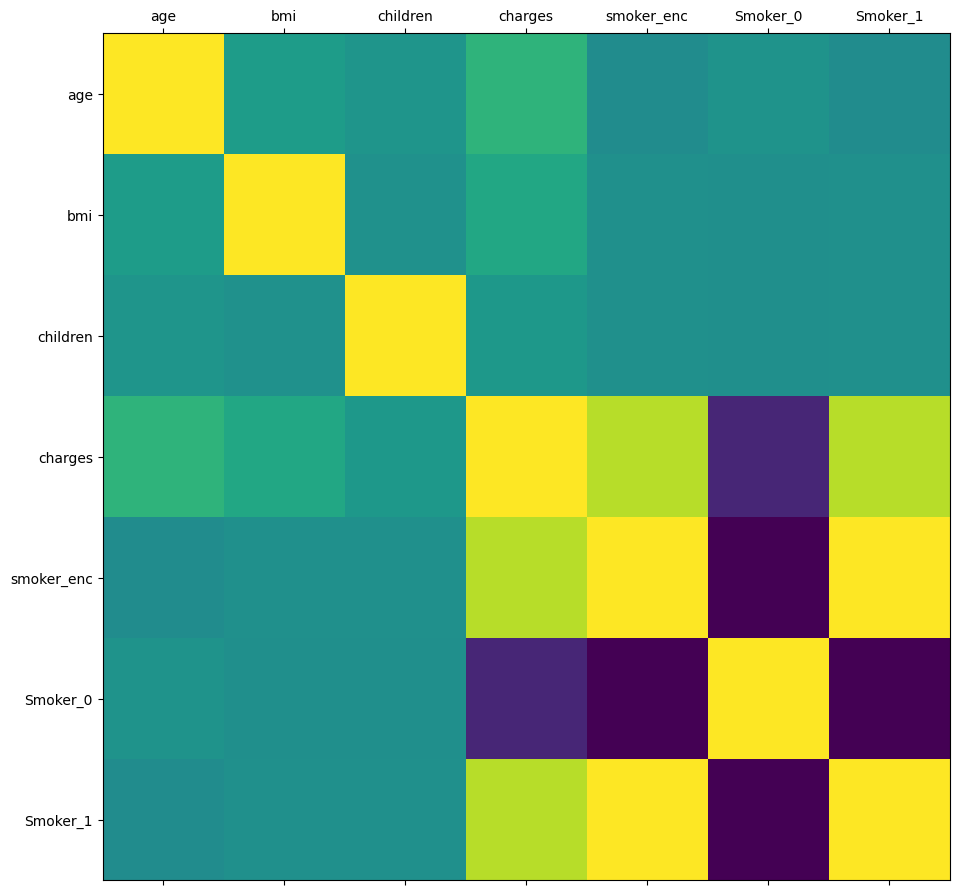

In [30]:
plot_corr(insurance) #creating a visual representation of correlation of columns

In [31]:
del insurance['smoker_enc']

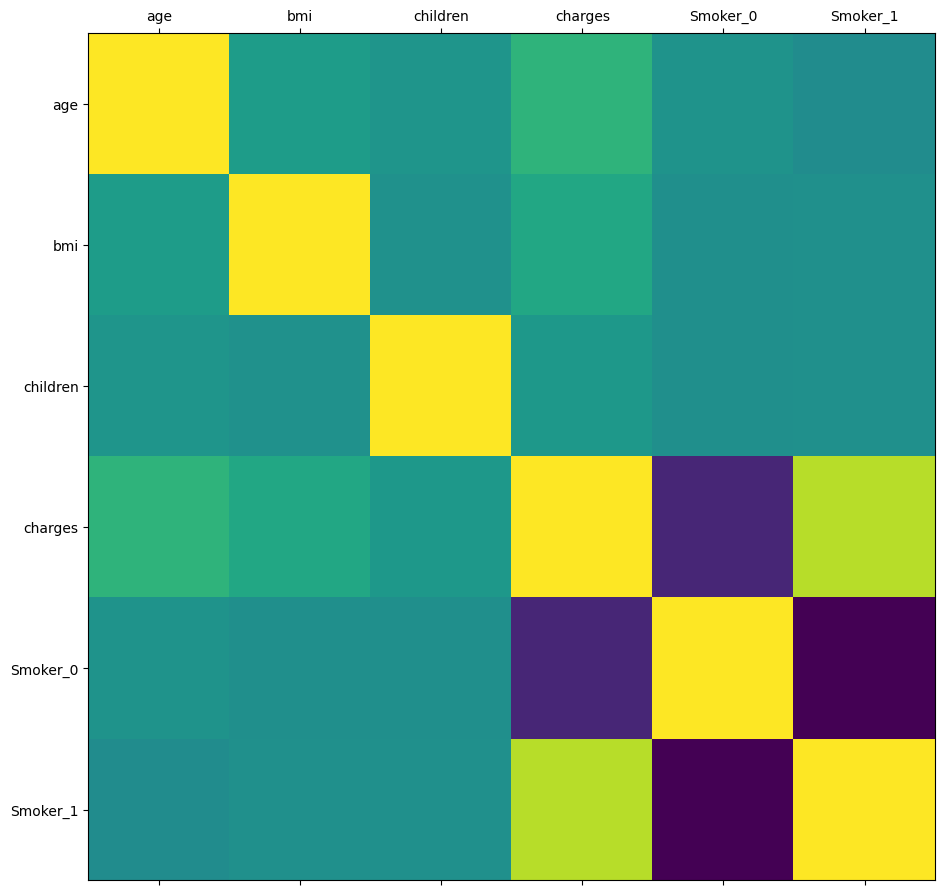

In [33]:
plot_corr(insurance)

In [34]:
insurance.corr() #rechecking for the correlation of columns

,age,bmi,children,charges,Smoker_0,Smoker_1
age,1.000000,0.109272,0.042469,0.299008,0.025019,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,-0.003750,0.003750
children,0.042469,0.012759,1.000000,0.067998,-0.007673,0.007673
charges,0.299008,0.198341,0.067998,1.000000,-0.787251,0.787251
Smoker_0,0.025019,-0.003750,-0.007673,-0.787251,1.000000,-1.000000
Smoker_1,-0.025019,0.003750,0.007673,0.787251,-1.000000,1.000000


In [36]:
from sklearn.model_selection import train_test_split

feature_col_names = ['age', 'bmi', 'children', 'charges', 'Smoker_0', 'Smoker_1']
predicted_class_names = ['Smoker_0']

X = insurance[feature_col_names].values     
y = insurance[predicted_class_names].values 
split_test_size = 0.15 #setting the test size to 15%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 